# NATURAL LANGUAGE PROCESSING 

Nama : Tri Ilman Almunawarah Fattah
NIM  : 32602000101

---

In [1]:
import pandas as pd
import numpy as np

file_loc = "clickbait.csv"
df = pd.read_csv(file_loc, index_col=None)

print(df)

                                                   text  label
0     Purnomo Serahkan Surat Mundur dari Pilkada  ke...      0
1     Pemkot Bekasi Teken Aturan Tempat Hiburan Menu...      0
2     New Normal 5 Juni, ASN Tak Mesti Berbondong-bo...      0
3     WHO Waspadai Banyak Kematian di Puncak Kedua P...      0
4                      VIDEO: Trump Ancam Tutup Twitter      1
...                                                 ...    ...
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0

[3237 rows x 2 columns]


[Text(0, 0, '1844'), Text(0, 0, '1393')]

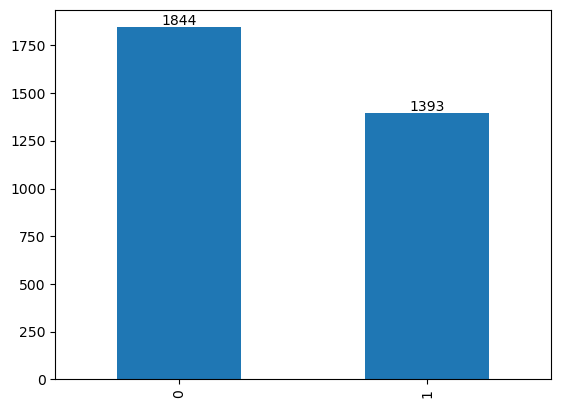

In [2]:
fig = df['label'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0], label_type='edge')

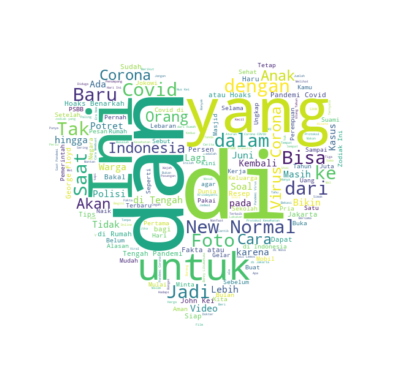

In [3]:
# install wordcloud library jika belum add
!pip install wordcloud

#wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from io import BytesIO

# Mask Heart Shape 
mask = np.array(Image.open("wordcloud-mask-heart.jpg"))

wordcld = WordCloud(background_color="white", repeat=True,
                   mask=mask).generate(' '.join(df['text']))

#Generate plot
plt.imshow(wordcld, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
!pip install cleantext 

import cleantext

In [5]:
df["text"] = df['text'].apply(lambda x: cleantext.clean(
    x,
    punct=True,
    extra_spaces=True,
    numbers=True,
    lowercase=True,
    stemming=False,
    stopwords=True,
    stp_lang='indonesian' #stopword bahasa Indonesia
))
print(df)

                                                   text  label
0     purnomo serahkan surat mundur pilkada dpc pdip...      0
1         pemkot bekasi teken aturan hiburan new normal      0
2     new normal juni asn mesti berbondongbondong ka...      0
3           who waspadai kematian puncak pandemi corona      0
4                       video trump ancam tutup twitter      1
...                                                 ...    ...
3232  polisi penyerangan green lake city nus kei joh...      0
3233  alasan anak buah john key bikin ribut rumah nu...      1
3234  fakta john kei godfather jakarta terlibat pemb...      1
3235  kemarin malam mencekam suasana terkini tytyan ...      1
3236  ricuh green lake city diduga disebabkan pribad...      0

[3237 rows x 2 columns]


In [6]:
import nltk #natural language tool kits
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
train_df = df.sample(frac=0.8, random_state=200)
eval_df = df.drop(train_df.index)

print(train_df)
print(eval_df)

train_df.shape

                                                   text  label
1657                         pasar kota bandung ditutup      1
2893  pengunggah video dokter busana surabaya ditang...      0
2763             soroti cfd dki muhadjir beres evaluasi      0
954   penyajian data odp pdp menampilkan hasil akumu...      0
1567  juru bicara covid potret terbaru dokter reisa ...      1
...                                                 ...    ...
3164  relawan perempuan salah kunci sukses thailand ...      0
3111            warga menghabiskan terlama media sosial      1
842                isu dugaan konspirasi covid peneliti      1
84    jelang new normal polda sumut siapkan video ca...      0
48                                    idulfitri pandemi      0

[2590 rows x 2 columns]
                                                   text  label
17    sekuel film sonic the hedgehog tahap pengembangan      0
18                 tips aman bersih mengolah jamu rumah      1
67    pakai masker rumah kuran

(2590, 2)

In [8]:
eval_df.shape

(647, 2)

In [9]:
!pip install simpletransformers #BERT bedirectional Encoder 

from simpletransformers.classification import ClassificationModel, ClassificationArgs
import torch
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false" #menghindari warning

# cuda_available = torch.cuda.is_available( #to activate CUDA
# )

model_args = ClassificationArgs(num_train_epochs=1,
                               learning_rate=5e-5,
                               overwrite_output_dir=True)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=2,
    args=model_args,
    use_cuda=False,
)

2023-08-09 11:40:57.152768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
model.train_model(train_df)

/home/tiaf/miniconda3/envs/courses/lib/python3.11/site-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2590 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/324 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

print(result)

In [ ]:
# Make prediction with the model
predictions, raw_outputs = model.predict(["sekuel film sonic the the hedgehog"])

print(predictions)
print(raw_outputs)

In [ ]:
import sklearn

model.train_model(train_df, acc=sklearn.metrics.accuracy_score)

result, model_output